In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

df = pd.read_csv('amazon.csv')
print(df.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     18778586   RDIJS7QYB6XNR  B00EDBY7X8       122952789   
1          US     24769659  R36ED1U38IELG8  B00D7JFOPC       952062646   
2          US     44331596   R1UE3RPRGCOLD  B002LHA74O       818126353   
3          US     23310293  R298788GS6I901  B00ARPLCGY       261944918   
4          US     38745832    RNX4EXOBBPN5  B00UZOPOFW       717410439   

                                       product_title product_category  \
0                         Monopoly Junior Board Game             Toys   
1  56 Pieces of Wooden Train Track Compatible wit...             Toys   
2         Super Jumbo Playing Cards by S&S Worldwide             Toys   
3           Barbie Doll and Fashions Barbie Gift Set             Toys   
4  Emazing Lights eLite Flow Glow Sticks - Spinni...             Toys   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

In [4]:
# Describing the Dataset

data = df.copy()
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000
mean,2.341813e+07,5.142841e+08,4.183673,0.346939,0.693878
std,1.554717e+07,2.979974e+08,1.364329,0.751416,1.211130
min,1.255180e+05,5.744768e+07,1.000000,0.000000,0.000000
25%,1.219123e+07,2.269842e+08,4.000000,0.000000,0.000000
50%,2.049459e+07,4.809923e+08,5.000000,0.000000,0.000000
75%,3.874583e+07,7.805176e+08,5.000000,0.000000,1.000000
max,5.200629e+07,9.966119e+08,5.000000,4.000000,6.000000


In [5]:
#  Information : column name with data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        49 non-null     object
 1   customer_id        49 non-null     int64 
 2   review_id          49 non-null     object
 3   product_id         49 non-null     object
 4   product_parent     49 non-null     int64 
 5   product_title      49 non-null     object
 6   product_category   49 non-null     object
 7   star_rating        49 non-null     int64 
 8   helpful_votes      49 non-null     int64 
 9   total_votes        49 non-null     int64 
 10  vine               49 non-null     object
 11  verified_purchase  49 non-null     object
 12  review_headline    49 non-null     object
 13  review_body        49 non-null     object
 14  review_date        49 non-null     object
dtypes: int64(5), object(10)
memory usage: 5.9+ KB


In [8]:
#We need to clean  up the name column by referencing review_id (unique products)
data["review_id"].unique()

array(['RDIJS7QYB6XNR', 'R36ED1U38IELG8', 'R1UE3RPRGCOLD',
       'R298788GS6I901', 'RNX4EXOBBPN5', 'R3BPETL222LMIM',
       'R3SORMPJZO3F2J', 'R2RDOJQ0WBZCF6', 'R2B8VBEPB4YEZ7',
       'R1CB783I7B0U52', 'R2D90RQQ3V8LH', 'R1Y4ZOUGFMJ327',
       'R2BUV9QJI2A00X', 'RSUHRJFJIRB3Z', 'R1T96CG98BBA15',
       'R2ATXF4QQ30YW', 'R1YS3DS218NNMD', 'R2SDXLTLF92O0H',
       'R4R337CCDWLNG', 'R32Z6UA4S5Q630', 'R1H1HOVB44808I',
       'R4UVQIRZ5T1FM', 'R226K8IJLRPTIR', 'R3031Q42BKAN7J',
       'R44NP0QG6E98W', 'R24VKWVWUMV3M3', 'R2MW3TEBPWKENS',
       'R3N01IESYEYW01', 'RKLAK7EPEG5S6', 'R1HOJ5GOA2JWM0',
       'RO5VL1EAPX6O3', 'R3OSJU70OIBWVE', 'R3NFZZCJSROBT4',
       'R47XBGQFP039N', 'R1JS8G26X4RM2G', 'R1ORWPFQ9EDYA0',
       'R1YIX4SO32U0GT', 'R1W3QQZ8JKECCI', 'RZX17JIYIPAR',
       'RIDVQ4P3WJR42', 'R1WQ3ME3JAG2O1', 'RNTPOUDQIICBF',
       'R3AHZWWOL0IAV0', 'R3PDXKS9O2Z20B', 'R23URALWA7IHWL',
       'R36L8VKT9ZSUY6', 'R23JRQR6VMY4TV', 'R3T73PQZZ9F6GT',
       'R300I65NW30Y19'], dtype=object)

In [9]:
review_id_unique = len(data["review_id"].unique())
print("Number of Unique Review ID: " + str(review_id_unique))

Number of Unique Review ID: 49


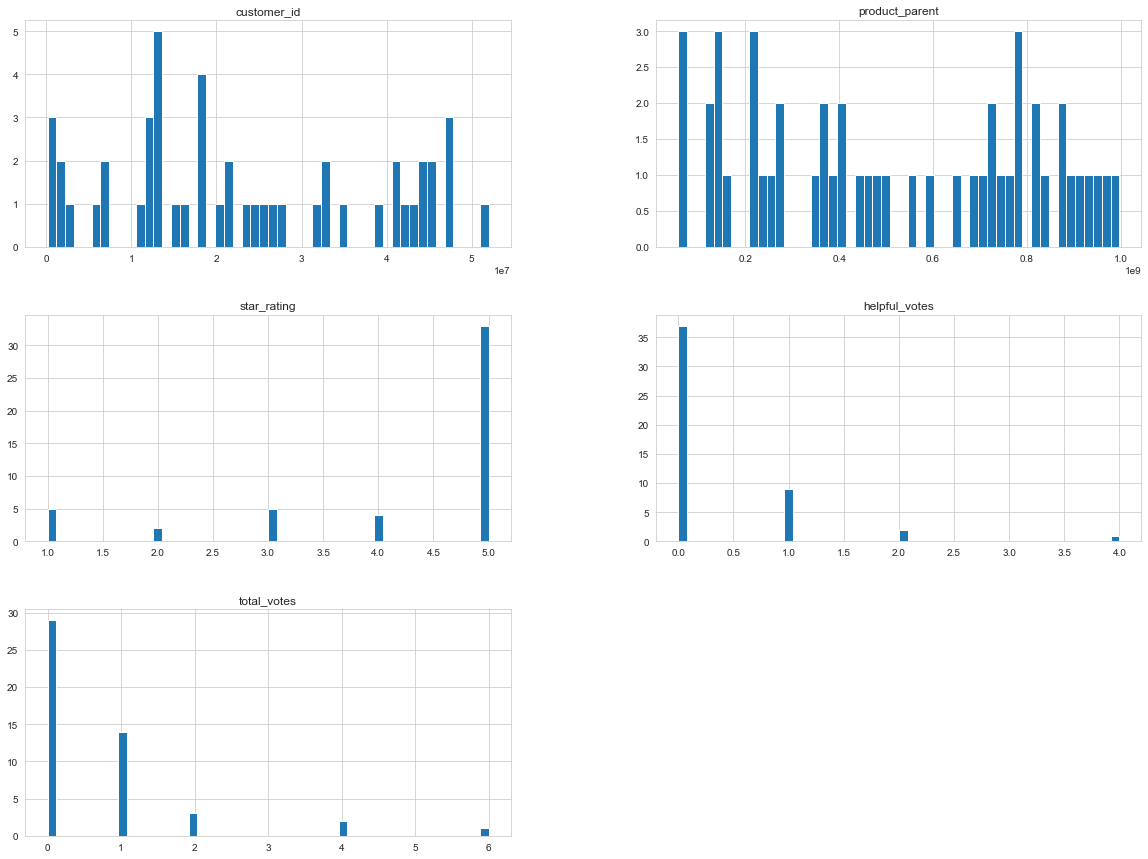

In [10]:
#Visualizing the distributions of numerical variables:

data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#we will split it into training set and test sets. Our goal is to train a sentiment analysis classifier.

#we will need to do a stratified split on the reviews score  (star rating)

from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["star_rating"])
# Removes all NAN in star.rating
print("After {}".format(len(dataAfter)))
dataAfter["star_rating"] = dataAfter["star_rating"].astype(int)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["star_rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before 49
After 49


In [13]:
#We need to see if train and test sets were stratified proportionately in comparison to raw data:

print(len(strat_train))
print(len(strat_test))
print(strat_test["star_rating"].value_counts()/len(strat_test))

39
10
5    0.7
1    0.1
4    0.1
3    0.1
Name: star_rating, dtype: float64


In [14]:
#We will use regular expressions to clean out any unfavorable characters in the dataset

reviews = strat_train.copy()
reviews.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
37,US,11210951,R1W3QQZ8JKECCI,B003JT0L4Y,876626440,Ocean Life Stamps Birthday Party Supplies Loot...,Toys,5,0,0,N,Y,Fun for birthday party favor,I ordered these for my 3 year old son's birthd...,31-08-2015
45,US,11916403,R36L8VKT9ZSUY6,B00JVY9J1M,771795950,Winston Zeddmore & Ecto-1: Funko POP! Rides x ...,Toys,5,0,0,N,Y,Five Stars,love it,31-08-2015
21,US,25402244,R4UVQIRZ5T1FM,1591749352,741582499,Klutz Sticker Design Studio: Create Your Own C...,Toys,4,1,2,N,Y,Great product for little girls!,I got these for my daughters for plane trip. I...,31-08-2015
22,US,32910511,R226K8IJLRPTIR,B00V5DM3RE,587799706,Yoga Joes - Green Army Men Toys,Toys,5,0,1,N,Y,Creative and fun!,My girlfriend and I are both into yoga and I g...,31-08-2015
20,US,6762003,R1H1HOVB44808I,B00PXWS1CY,996611871,Holy Stone F180C Mini RC Quadcopter Drone with...,Toys,5,1,1,N,N,Five Stars,Awesome customer service and a cool little dro...,31-08-2015


In [21]:
print(len(reviews["product_parent"].unique()), len(reviews["review_id"].unique()))
print(reviews.info())

39 39
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 37 to 38
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        39 non-null     object
 1   customer_id        39 non-null     int64 
 2   review_id          39 non-null     object
 3   product_id         39 non-null     object
 4   product_parent     39 non-null     int64 
 5   product_title      39 non-null     object
 6   product_category   39 non-null     object
 7   star_rating        39 non-null     int32 
 8   helpful_votes      39 non-null     int64 
 9   total_votes        39 non-null     int64 
 10  vine               39 non-null     object
 11  verified_purchase  39 non-null     object
 12  review_headline    39 non-null     object
 13  review_body        39 non-null     object
 14  review_date        39 non-null     object
dtypes: int32(1), int64(4), object(10)
memory usage: 5.8+ KB
None


4.153846153846154


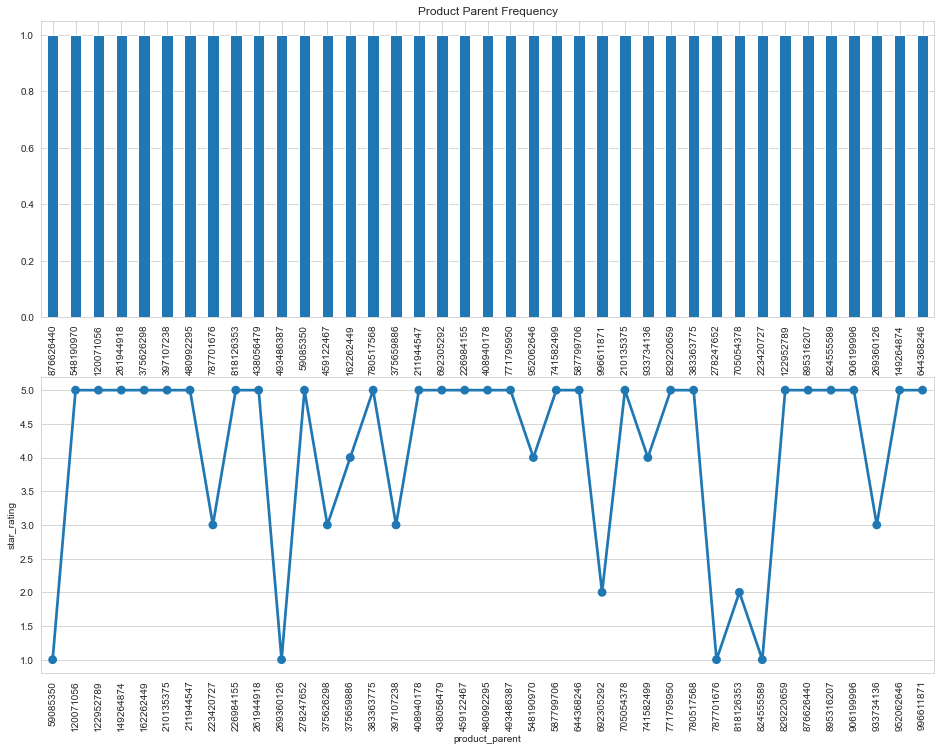

In [22]:
#Entire training dataset average rating

print(reviews["star_rating"].mean())
asins_count_ix = reviews["product_title"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["product_parent"].value_counts().plot(kind="bar", title="Product Parent Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="product_parent", y="star_rating",  data=reviews)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Using the features in place, we will build a classifier that can determine a review’s sentiment.

def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
    
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["star_rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["star_rating"].apply(sentiments)
print(strat_train["Sentiment"][:20])

37    Positive
45    Positive
21    Positive
22    Positive
20    Positive
16    Positive
14     Neutral
25    Positive
7     Positive
1     Positive
27    Positive
18     Neutral
0     Positive
31    Positive
40    Negative
28    Positive
9     Negative
48    Positive
17    Positive
34    Positive
Name: Sentiment, dtype: object
